# Credit Card Customer Churn EDA & Prediction
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

### About this file
PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING**

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

## 1. Introduction
Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Banks, telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics (along with cash flow, EBITDA, etc.) because the cost of retaining an existing customer is far less than acquiring a new one.[1] Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients. https://en.wikipedia.org/wiki/Customer_attrition

## 2. Importing Libraries and Dataset

In [171]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [172]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Drop last 2 cols because of no use

In [174]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [175]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## 3. Exploratory Data Analysis
### 3.1 Based On Frequency of Use and Numeral Characteristics

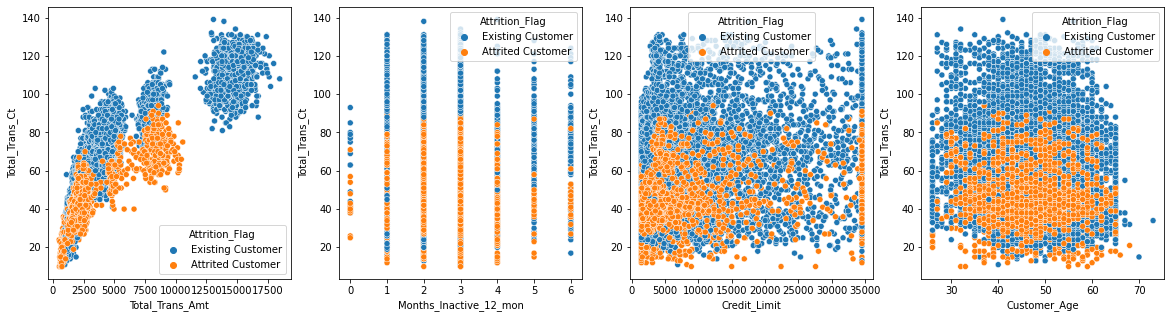

In [176]:
df_frequency=pd.concat([df['Customer_Age'],df['Total_Trans_Ct'],df['Total_Trans_Amt'],df['Months_Inactive_12_mon'],df['Credit_Limit'],df['Attrition_Flag']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

We see clearly above that we for all 4 features, we can point out the following hypothesis:

1. The higher they spend annually, the customers are more likely to remain.
2. After 2-3 months of inactivity, the customers are more likely to leave.
3. The higher the credit limit is, the customers are more likely to remain.
4. Age distribution does not really matter in this case, because the clusters are largely overlapped.
5. Almost all churned customers used their cards below 100 times.

### 3.2 Based On Demographics

In [177]:
df_demographic=pd.concat([df['Customer_Age'],df['Gender'],df['Education_Level'],df['Marital_Status'],df['Income_Category'],df['Attrition_Flag']],axis=1)

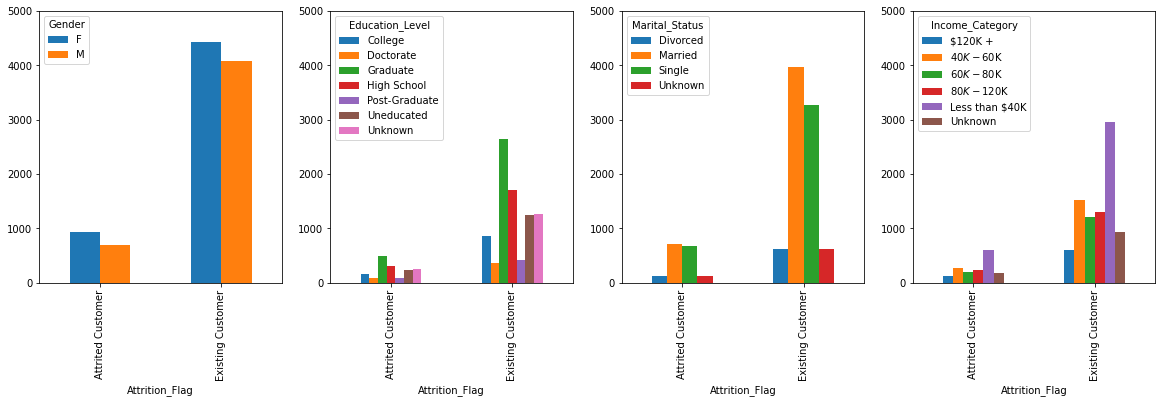

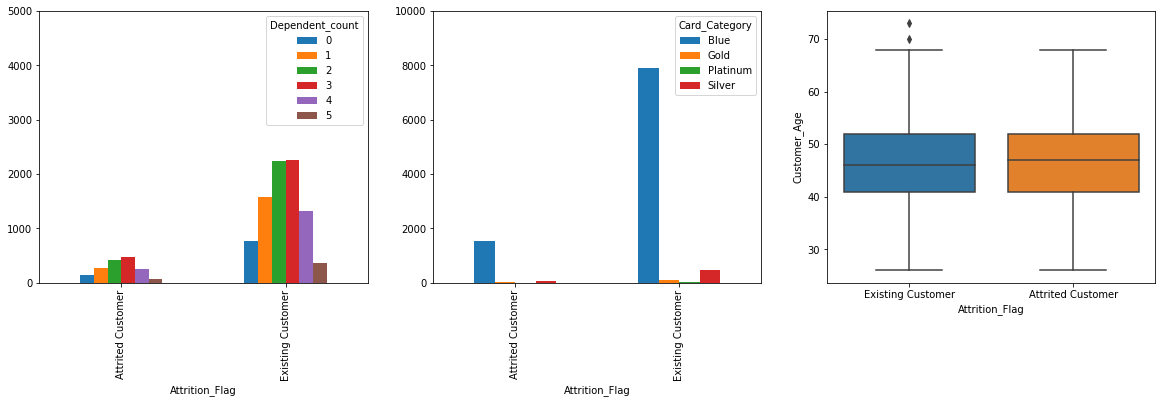

In [178]:
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

While the figures indeed show some disparity in numbers between churned and existing customers, the distribution of each category is very similar. Also to support the claims of previous figure, we see again that age does not play a major factor in churned and existing customers.
Meaning: The figures above shows that each category cannot be used alone as a factor to decide customer churn. A married female with higher income and education is a different demographic than a single female with medium income and education. As such, we will need to weigh in all these features to build our model.

## 4. Feature Engineering and Selection
### 4.1 Balance/Imbalance

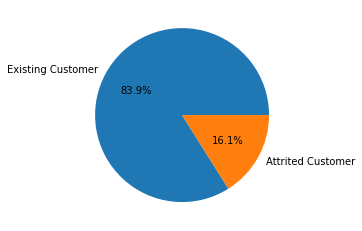

In [179]:
churn=df['Attrition_Flag'].value_counts()
churn
_piechart=plt.pie(x=churn,labels=churn.keys(),autopct="%.1f%%")

Not a great ratio to have. This shows an imbalance in the dataset which can result in predictors making false positives/negatives because the attrition data is undersampled. We will need to counter this issue later when building our model.

### 4.2 Correlation
Since we have a dataset with mixed features: categorical and numerical, we cannot simply use standard correlation function (Pearson coefficient). We will have to split the features into separate tables, and: 
- Measure numerical data correlation via Pearson
- Measure categorical data via Cramer's V function.

In [180]:
df_categorical=df.loc[:,df.dtypes==np.object]
df_categorical = df_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()

<ipython-input-180-d43b5b4f76e3>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical=df.loc[:,df.dtypes==np.object]


,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


<ipython-input-181-ad45b9e1a71a>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))


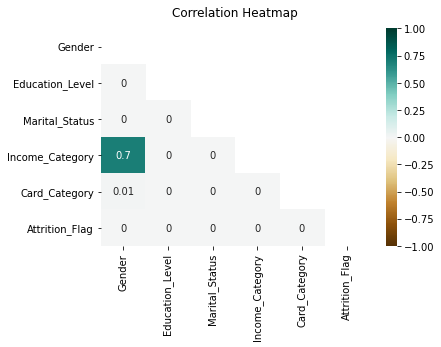

In [181]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame() 

for i in df_categorical.columns :
    df_categorical_encoded[i]=label.fit_transform(df_categorical[i])

from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows= []

for var1 in df_categorical_encoded:
    col = []
    for var2 in df_categorical_encoded :
        cramers =cramers_V(df_categorical_encoded[var1], df_categorical_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
cramerv_matrix = pd.DataFrame(cramers_results, columns = df_categorical_encoded.columns, index =df_categorical_encoded.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We see here that the categorical columns are NOT CORRELATED with customer churn by themselves. This supports the previous figures that show similar distribution between existing and churned customers across all demographic. Building an accurate model without considering the numerical values is impossible.

Now let's check the correlation of the numerical values.

In [182]:
df_numerical=df.loc[:,df.dtypes!=np.object]
df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']
oh=pd.get_dummies(df_numerical['Attrition_Flag'])
df_numerical=df_numerical.drop(['Attrition_Flag'],axis=1)
df_numerical=df_numerical.drop(['CLIENTNUM'],axis=1)
df_numerical=df_numerical.join(oh)
df_numerical.head()

<ipython-input-182-1f580e325e25>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_numerical=df.loc[:,df.dtypes!=np.object]
<ipython-input-182-1f580e325e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Attrition_Flag']=df.loc[:,'Attrition_Flag']


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


<ipython-input-183-e0d35df789fe>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(num_corr, dtype=np.bool))


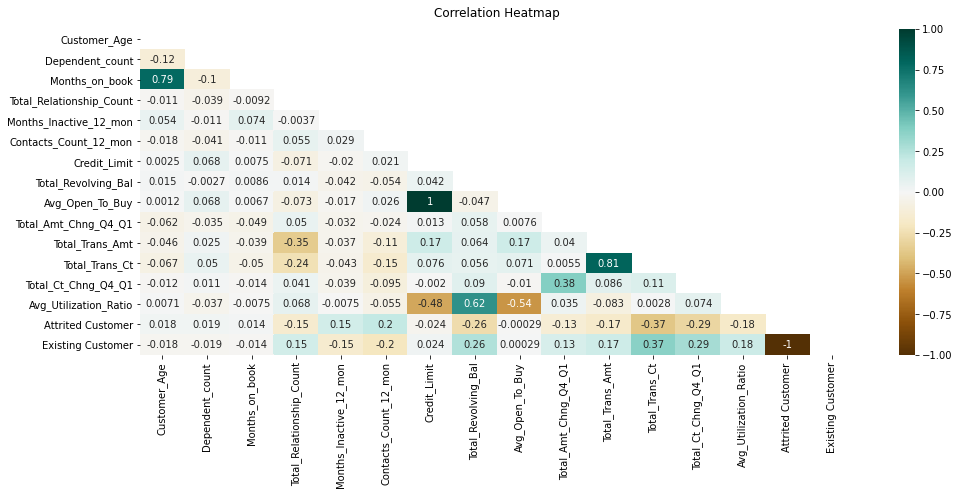

In [183]:
##Point Biserial Correlation
from scipy import stats
num_corr=df_numerical.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(num_corr, dtype=np.bool))
num_heatmap = sns.heatmap(num_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
num_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We now see better correlation measurements to the customer churn. In the heatmap above, the correlation coefficient of attrited and existing customer to all feature columns are identical in numbers, with mirroring signs (+ and -). 

Let's view them better:

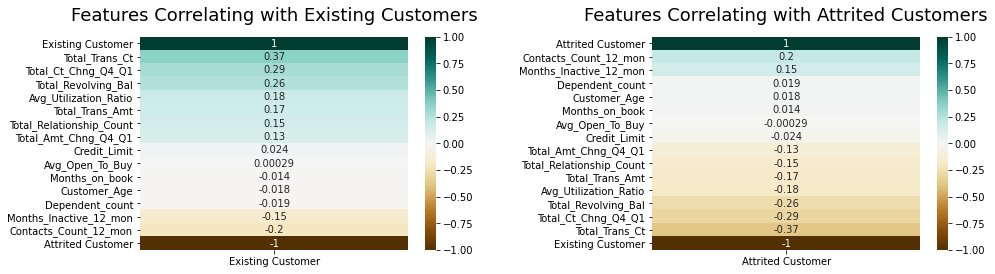

In [184]:
fig, ax=plt.subplots(ncols=2,figsize=(15, 5))

heatmap = sns.heatmap(num_corr[['Existing Customer']].sort_values(by='Existing Customer', ascending=False), ax=ax[0],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Existing Customers', fontdict={'fontsize':18}, pad=16);
heatmap = sns.heatmap(num_corr[['Attrited Customer']].sort_values(by='Attrited Customer', ascending=False), ax=ax[1],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Attrited Customers', fontdict={'fontsize':18}, pad=16);

fig.tight_layout(pad=5)

We see above that the following features are not correlated with customer churn (between -0.1 and +0.1) :

1. Credit Limit
2. Average Open To Buy
3. Months On Book
4. Age
5. Dependent Count

### 4.3 Removing Non-Correlating Columns

In [185]:
df_model=df
df_model=df_model.drop(['CLIENTNUM','Credit_Limit','Customer_Age','Avg_Open_To_Buy','Months_on_book','Dependent_count'],axis=1)
df_model.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,1291,33,3.714,0.105
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue,3,4,1,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,816,28,2.500,0.000


### 4.4 One Hot Encoding
Now we convert the categorical features into binary with one hot encoding

In [186]:
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
df_oh=pd.get_dummies(df_model)
df_oh['Attrition_Flag'] = df_oh['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})
list(df_oh.columns)

['Attrition_Flag',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_F',
 'Gender_M',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

## 5. Model Training
Now we train different classifiers and try to obtain the most accurate model. We will utilize:

1. Random Forest
2. Support Vector Machine
3. Gradient Boosting
4. Logistic regression

### 5.1 Balancing the Training Dataset
Before we train our prediction model, we will have to tinker with our imbalanced dataset first. In section 4.1 we see that churned customer takes only 16.1% of the data.

To balance the dataset, we will utilize SMOTE. SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

First we split our training and test data. SMOTE will be applied only to training dataset so that the prediction will use original dataset with no synthetic datapoints.

incase cannot pip install imblearn then

Try to install:

- pip: pip install -U imbalanced-learn
- anaconda: conda install -c glemaitre imbalanced-learn

Then try to import library in your file:

- from imblearn.over_sampling import SMOTE


In [187]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_oh.loc[:, df_oh.columns != 'Attrition_Flag']
y = df_oh['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sm = SMOTE(sampling_strategy='minority', k_neighbors=20, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [188]:
X_train

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
1163,5,3,2,1006,0.654,1537,35,0.591,0.046,0,...,0,0,0,1,0,0,1,0,0,0
1584,5,3,2,688,0.673,3382,58,1.071,0.115,0,...,0,0,1,0,0,0,1,0,0,0
6332,5,1,2,1870,0.722,4018,63,0.800,0.181,1,...,0,0,0,0,0,1,1,0,0,0
3643,4,6,4,1434,0.472,3609,76,0.551,0.054,1,...,0,0,0,0,0,1,1,0,0,0
6006,5,1,3,1913,0.598,4136,69,0.568,0.692,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3,2,5,2517,0.809,2104,44,0.833,0.608,1,...,0,1,0,0,0,0,1,0,0,0
5191,4,3,6,0,0.551,2269,42,0.312,0.000,1,...,0,0,0,0,0,1,1,0,0,0
5390,3,1,2,1547,0.804,4678,74,1.000,0.669,1,...,0,0,0,0,1,0,1,0,0,0
860,4,1,1,1707,0.506,1482,42,0.312,0.479,0,...,0,1,0,0,0,0,1,0,0,0


### 5.2 Random Forest Classifier

In [189]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier()

### 5.3 Support Vector Machine

In [190]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train_res, y_train_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### 5.4 Gradient Boosting

In [191]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
gb_clf.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

### 5.5 Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train_res, y_train_res)

/Users/cuongv.nguyen/opt/anaconda3/envs/causalnex/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 6. Prediction Models
### 6.1 First Prediction

In [193]:
y_rf=rf_clf.predict(X_test)
y_svm=svm_clf.predict(X_test)
y_gb=gb_clf.predict(X_test)
y_lgr = lgr.predict(X_test)

### 6.2 First Evaluation

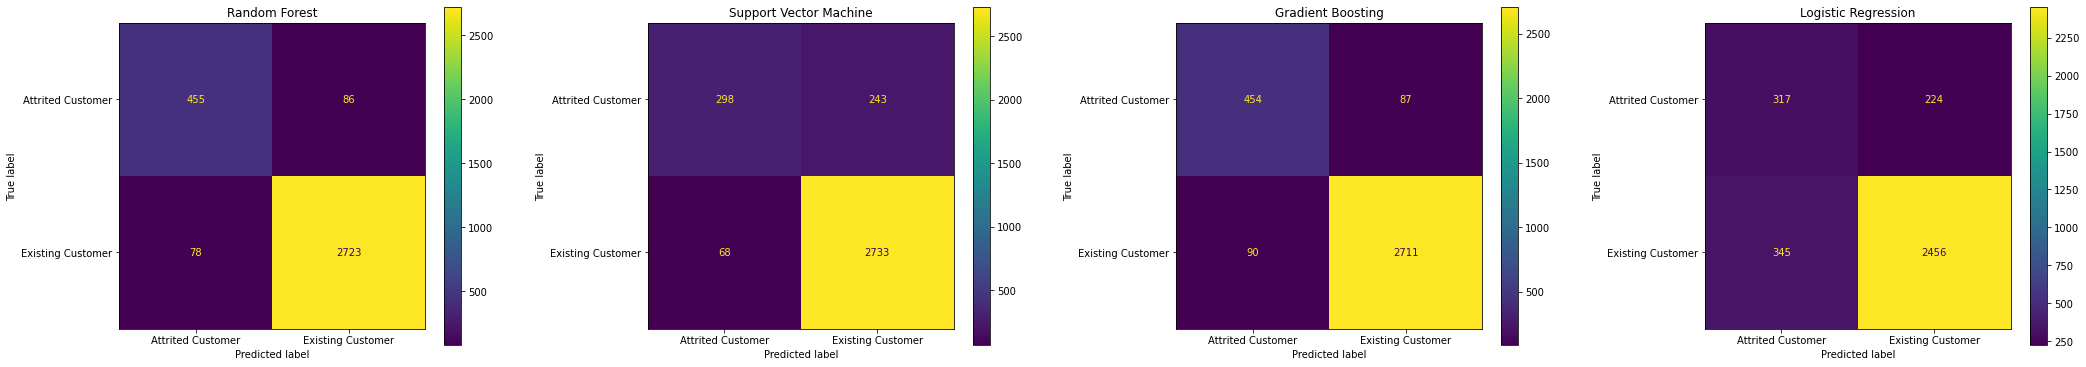

In [212]:
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(ncols=4, figsize=(30,6))
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax[0])
ax[0].title.set_text('Random Forest')
plot_confusion_matrix(svm_clf, X_test, y_test, ax=ax[1])
ax[1].title.set_text('Support Vector Machine')
plot_confusion_matrix(gb_clf, X_test, y_test, ax=ax[2])
ax[2].title.set_text('Gradient Boosting')
plot_confusion_matrix(lgr, X_test, y_test, ax=ax[3])
ax[3].title.set_text('Logistic Regression')
fig.tight_layout(pad=4)

In [213]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
print('Random Forest Classifier')
print(classification_report(y_test, y_rf))
print('------------------------')
print('Support Vector Machine')
print(classification_report(y_test, y_svm))
print('------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_gb))
print('------------------------')
print('Logistic Regression')
print(classification_report(y_test, y_lgr))

Random Forest Classifier
                   precision    recall  f1-score   support

Attrited Customer       0.85      0.84      0.85       541
Existing Customer       0.97      0.97      0.97      2801

         accuracy                           0.95      3342
        macro avg       0.91      0.91      0.91      3342
     weighted avg       0.95      0.95      0.95      3342

------------------------
Support Vector Machine
                   precision    recall  f1-score   support

Attrited Customer       0.81      0.55      0.66       541
Existing Customer       0.92      0.98      0.95      2801

         accuracy                           0.91      3342
        macro avg       0.87      0.76      0.80      3342
     weighted avg       0.90      0.91      0.90      3342

------------------------
Gradient Boosting
                   precision    recall  f1-score   support

Attrited Customer       0.83      0.84      0.84       541
Existing Customer       0.97      0.97      0.97   

We see in both the confusion matrix and classification report that random forest and gradient boosting works best with recall score above 85%.

### 6.3 Tuning Hyperparameters
Now we will attempt to raise the model accuracy even more. We can achieve this by tuning the algorithm hyperparameters. Since SVM and Logistric regression produced very low accuracy, we will not consider this algorithm any further.

- Tunning RandomForest by Random Search

In [214]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Fit the random search model
rf_random.fit(X_train_res, y_train_res)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


Random Forest Classifier (Optimized)
                   precision    recall  f1-score   support

Attrited Customer       0.87      0.82      0.84       541
Existing Customer       0.97      0.98      0.97      2801

         accuracy                           0.95      3342
        macro avg       0.92      0.90      0.91      3342
     weighted avg       0.95      0.95      0.95      3342



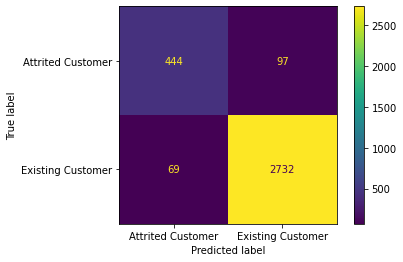

In [215]:
rf_clf_opt= RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=None, bootstrap=False)
rf_clf_opt.fit(X_train_res,y_train_res)
y_rf_opt=rf_clf_opt.predict(X_test)
print('Random Forest Classifier (Optimized)')
print(classification_report(y_test, y_rf_opt))
_rf_opt=plot_confusion_matrix(rf_clf_opt, X_test, y_test)

- Tunning GradientBoosting by GridSearch

In [32]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1.0, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test1, 
                        scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1.fit(X_train_res,y_train_res)
print(gsearch1.best_params_)

{'n_estimators': 80}


Gradient Boosting (Optimized)
                   precision    recall  f1-score   support

Attrited Customer       0.86      0.85      0.86       541
Existing Customer       0.97      0.97      0.97      2801

         accuracy                           0.95      3342
        macro avg       0.92      0.91      0.91      3342
     weighted avg       0.95      0.95      0.95      3342

0.8521256931608133


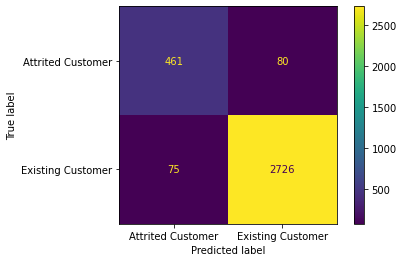

In [216]:
gb_clf_opt=GradientBoostingClassifier(n_estimators=80,learning_rate=1.0, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
gb_clf_opt.fit(X_train_res,y_train_res)
y_gb_opt=gb_clf_opt.predict(X_test)
print('Gradient Boosting (Optimized)')
print(classification_report(y_test, y_gb_opt))
print(recall_score(y_test,y_gb_opt,pos_label="Attrited Customer"))
_gbopt=plot_confusion_matrix(gb_clf_opt, X_test, y_test)

# 7. Conclusion
After tuning the hyperparameters and reevaluating, there were no significant change to the recall score and accuracy. However, the model can be considered good enough as it is 95% accurate and has 84% recall score